In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_df =  pd.read_csv('D:/22022546_Tạ Nguyên Dũng/Data/ktqdNEU2.csv')
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        140 non-null    int64  
 1   text                           131 non-null    object 
 2   post_text                      112 non-null    object 
 3   shared_text                    21 non-null     object 
 4   original_text                  0 non-null      float64
 5   time                           140 non-null    object 
 6   timestamp                      140 non-null    int64  
 7   image                          93 non-null     object 
 8   image_lowquality               140 non-null    object 
 9   images                         140 non-null    object 
 10  images_description             140 non-null    object 
 11  images_lowquality              140 non-null    object 
 12  images_lowquality_description  140 non-null    obj

In [3]:
clean_data = raw_df[['post_id','text','post_text','time','images_description','comments','shares','comments_full','reactors','reactions','reaction_count']]
clean_data

,post_id,text,post_text,time,images_description,comments,shares,comments_full,reactors,reactions,reaction_count
0,732948108863591,"Thư viện điện tử 11 triệu USD, triệu cuốn sách...","Thư viện điện tử 11 triệu USD, triệu cuốn sách...",2023-11-25 18:25:19,"['Có thể là hình ảnh về văn bản', 'Có thể là h...",91,40,"[{'comment_id': '648537020689218', 'comment_ur...",[],"{'thích': 673, 'yêu thích': 224, 'haha': 2, 'w...",923
1,323743073790793,NGÀY MAI LÚC 08:00\nChương trình trải nghiệm: ...,NaN,2023-11-24 17:31:29,[],0,0,[],NaN,NaN,0
2,732286135596455,Trường Đại học Kinh tế Quốc dân tổ chức thành ...,Trường Đại học Kinh tế Quốc dân tổ chức thành ...,2023-11-24 14:07:41,"[""Có thể là hình ảnh về 1 người, cái bục và vă...",0,0,[],"[{'name': 'Lê Quang Mênhh', 'link': 'https://f...","{'thích': 74, 'yêu thích': 7}",81
3,730862365738832,CHÚC MỪNG PGS.TS. LÊ THANH HÀ - KHOA KINH TẾ H...,CHÚC MỪNG PGS.TS. LÊ THANH HÀ - KHOA KINH TẾ H...,2023-11-21 21:17:08,"['Có thể là hình ảnh về 1 người, TV, phòng tin...",55,22,"[{'comment_id': '1156792611968391', 'comment_u...","[{'name': 'Thùy Linh', 'link': 'https://facebo...","{'thích': 836, 'yêu thích': 364, 'wow': 12, 't...",1223
4,730382429120159,Ngày 20/11 hàng năm không chỉ là dịp để tri ân...,Ngày 20/11 hàng năm không chỉ là dịp để tri ân...,2023-11-20 23:02:01,"['Có thể là hình ảnh về 15 người và văn bản', ...",1,8,[],"[{'name': 'Bao Thanh Thien', 'link': 'https://...","{'thích': 870, 'yêu thích': 431, 'thương thươn...",1312
...,...,...,...,...,...,...,...,...,...,...,...
135,256732383492541,"T6, 11 THÁNG 8\nGiới thiệu thông tin tuyển sin...",NaN,2023-08-11 12:41:54,[],0,0,[],NaN,NaN,0
136,670049668486769,"Kế hoạch học tập HK1, năm học 2023-2024 dành c...","Kế hoạch học tập HK1, năm học 2023-2024 dành c...",2023-08-10 18:50:23,[],0,0,[],NaN,NaN,0
137,670040705154332,Một buổi chiều mưa cực chill tại cafe sách NEU...,Một buổi chiều mưa cực chill tại cafe sách NEU...,2023-08-10 18:26:40,['May be an image of 6 people'],0,0,[],NaN,NaN,0
138,669834608508275,NaN,NaN,2023-08-10 09:47:05,"['Không có mô tả ảnh.', 'Không có mô tả ảnh.']",0,0,[],NaN,NaN,0


CLEANING DATA

In [4]:
clean_data = clean_data.fillna({"reactions" : "{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'care': 0, 'sad': 0, 'angry': 0}"})
#for i in clean_data:
clean_data

,post_id,text,post_text,time,images_description,comments,shares,comments_full,reactors,reactions,reaction_count
0,732948108863591,"Thư viện điện tử 11 triệu USD, triệu cuốn sách...","Thư viện điện tử 11 triệu USD, triệu cuốn sách...",2023-11-25 18:25:19,"['Có thể là hình ảnh về văn bản', 'Có thể là h...",91,40,"[{'comment_id': '648537020689218', 'comment_ur...",[],"{'thích': 673, 'yêu thích': 224, 'haha': 2, 'w...",923
1,323743073790793,NGÀY MAI LÚC 08:00\nChương trình trải nghiệm: ...,NaN,2023-11-24 17:31:29,[],0,0,[],NaN,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0
2,732286135596455,Trường Đại học Kinh tế Quốc dân tổ chức thành ...,Trường Đại học Kinh tế Quốc dân tổ chức thành ...,2023-11-24 14:07:41,"[""Có thể là hình ảnh về 1 người, cái bục và vă...",0,0,[],"[{'name': 'Lê Quang Mênhh', 'link': 'https://f...","{'thích': 74, 'yêu thích': 7}",81
3,730862365738832,CHÚC MỪNG PGS.TS. LÊ THANH HÀ - KHOA KINH TẾ H...,CHÚC MỪNG PGS.TS. LÊ THANH HÀ - KHOA KINH TẾ H...,2023-11-21 21:17:08,"['Có thể là hình ảnh về 1 người, TV, phòng tin...",55,22,"[{'comment_id': '1156792611968391', 'comment_u...","[{'name': 'Thùy Linh', 'link': 'https://facebo...","{'thích': 836, 'yêu thích': 364, 'wow': 12, 't...",1223
4,730382429120159,Ngày 20/11 hàng năm không chỉ là dịp để tri ân...,Ngày 20/11 hàng năm không chỉ là dịp để tri ân...,2023-11-20 23:02:01,"['Có thể là hình ảnh về 15 người và văn bản', ...",1,8,[],"[{'name': 'Bao Thanh Thien', 'link': 'https://...","{'thích': 870, 'yêu thích': 431, 'thương thươn...",1312
...,...,...,...,...,...,...,...,...,...,...,...
135,256732383492541,"T6, 11 THÁNG 8\nGiới thiệu thông tin tuyển sin...",NaN,2023-08-11 12:41:54,[],0,0,[],NaN,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0
136,670049668486769,"Kế hoạch học tập HK1, năm học 2023-2024 dành c...","Kế hoạch học tập HK1, năm học 2023-2024 dành c...",2023-08-10 18:50:23,[],0,0,[],NaN,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0
137,670040705154332,Một buổi chiều mưa cực chill tại cafe sách NEU...,Một buổi chiều mưa cực chill tại cafe sách NEU...,2023-08-10 18:26:40,['May be an image of 6 people'],0,0,[],NaN,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0
138,669834608508275,NaN,NaN,2023-08-10 09:47:05,"['Không có mô tả ảnh.', 'Không có mô tả ảnh.']",0,0,[],NaN,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0


In [5]:
clean_data.loc[clean_data['reaction_count'] == 0]

,post_id,text,post_text,time,images_description,comments,shares,comments_full,reactors,reactions,reaction_count
1,323743073790793,NGÀY MAI LÚC 08:00\nChương trình trải nghiệm: ...,NaN,2023-11-24 17:31:29,[],0,0,[],NaN,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0
5,2662042720629325,"T5, 23 THÁNG 11\nHội thảo khoa học quốc tế: Cá...",NaN,2023-11-20 18:24:06,[],0,0,[],NaN,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0
11,872558634283385,"T5, 16 THÁNG 11\nKỷ niệm 41 năm Ngày Nhà giáo ...",NaN,2023-11-15 15:18:21,[],0,0,[],NaN,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0
25,1567469867417275,"T5, 9 THÁNG 11\nLễ kỷ niệm 20 năm thành lập kh...",NaN,2023-11-07 11:15:50,[],0,0,[],NaN,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0
37,702125108530203,"T7, 28 THÁNG 10\nLỄ KỶ NIỆM 20 NĂM THÀNH LẬP K...",NaN,2023-10-27 10:35:38,[],0,0,[],NaN,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0
39,348549957747666,"T6, 27 THÁNG 10\nHội nghị: Đối thoại giữa hiệu...",NaN,2023-10-26 18:47:49,[],0,0,[],NaN,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0
40,253516003971426,"T5, 26 THÁNG 10\nHTKHQG: THÚC ĐẨY SỰ KẾT NỐI, ...",NaN,2023-10-25 21:52:23,[],0,0,[],NaN,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0
48,906959070527185,"T4, 18 THÁNG 10\nGặp gỡ tháng 10",NaN,2023-10-16 19:52:54,[],0,0,[],NaN,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0
53,857064789031139,"T4, 11 THÁNG 10\nĐại hội lần thứ XVI Công đoàn...",NaN,2023-10-11 10:40:24,[],0,0,[],NaN,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0
59,709385851034617,"T7, 7 THÁNG 10\nLỄ KHAI GIẢNG HỆ VỪA HỌC VỪA LÀM",NaN,2023-10-06 12:51:24,[],0,0,[],NaN,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0


In [6]:
sorted_data = clean_data.sort_values(by = 'reaction_count', ascending=False)
sorted_data

,post_id,text,post_text,time,images_description,comments,shares,comments_full,reactors,reactions,reaction_count
95,685739823584420,NaN,NaN,2023-09-06 10:24:12,['Có thể là hình ảnh về văn bản'],114,18,"[{'comment_id': '6464439700339100', 'comment_u...","[{'name': 'Dương Ngọc Lan', 'link': 'https://f...","{'thích': 4753, 'yêu thích': 1771, 'haha': 26,...",6617
44,712447980913604,CHÚC MỪNG NGÀY PHỤ NỮ VIỆT NAM 20/10\n\n🌺 Nhân...,CHÚC MỪNG NGÀY PHỤ NỮ VIỆT NAM 20/10\n\n🌺 Nhân...,2023-10-20 08:00:09,"[""Có thể là hình ảnh về văn bản cho biết 'NH C...",361,133,"[{'comment_id': '822701516273487', 'comment_ur...","[{'name': 'Danh Minh', 'link': 'https://facebo...","{'thích': 3136, 'yêu thích': 2334, 'haha': 34,...",5606
77,696552629169806,LỘ DIỆN NHỮNG TÂN SINH VIÊN ĐẠT THÀNH TÍCH CAO...,LỘ DIỆN NHỮNG TÂN SINH VIÊN ĐẠT THÀNH TÍCH CAO...,2023-09-24 11:57:42,"[""Có thể là hình ảnh về 8 người, cái bục và vă...",133,53,"[{'comment_id': '1448886172557142', 'comment_u...","[{'name': 'Danh Minh', 'link': 'https://facebo...","{'thích': 2472, 'yêu thích': 774, 'haha': 2, '...",3278
94,685823106909425,Những hình ảnh buổi đầu tiên về công tác kiểm ...,Những hình ảnh buổi đầu tiên về công tác kiểm ...,2023-09-06 14:00:14,"['Có thể là hình ảnh về 9 người và văn bản', '...",472,15,"[{'comment_id': '842070504325958', 'comment_ur...","[{'name': 'Nguyễn Khánh Linh', 'link': 'https:...","{'thích': 2696, 'yêu thích': 343, 'haha': 29, ...",3158
36,716852813806454,Thủ khoa Trường ĐH Kinh tế Quốc dân được nhận ...,Thủ khoa Trường ĐH Kinh tế Quốc dân được nhận ...,2023-10-27 16:56:33,"[""Có thể là hình ảnh về 1 người và văn bản cho...",137,51,"[{'comment_id': '1797795837308157', 'comment_u...","[{'name': 'Chu Mạnh', 'link': 'https://faceboo...","{'thích': 1883, 'yêu thích': 582, 'haha': 2, '...",2490
...,...,...,...,...,...,...,...,...,...,...,...
108,977713923512645,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-27 13:15:08,[],0,0,[],NaN,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0
109,676193010732292,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-27 07:00:07,[],0,0,[],NaN,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0
110,1270136470311946,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-26 12:59:52,[],0,0,[],NaN,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0
111,1237176660290613,"T7, 26 THÁNG 8\nLỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QU...",NaN,2023-08-26 12:36:06,[],0,0,[],NaN,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0


ANALYSE DATA

In [7]:
highest_reaction_post = sorted_data.iloc[0]
highest_reaction_post

post_id                                                 685739823584420
text                                                                NaN
post_text                                                           NaN
time                                                2023-09-06 10:24:12
images_description                    ['Có thể là hình ảnh về văn bản']
comments                                                            114
shares                                                               18
comments_full         [{'comment_id': '6464439700339100', 'comment_u...
reactors              [{'name': 'Dương Ngọc Lan', 'link': 'https://f...
reactions             {'thích': 4753, 'yêu thích': 1771, 'haha': 26,...
reaction_count                                                     6617
Name: 95, dtype: object

In [8]:
highest_reaction_post['text']

nan

In [9]:
highest_reaction_post['reaction_count']

6617

In [10]:
highest_reaction_post['reactions']

"{'thích': 4753, 'yêu thích': 1771, 'haha': 26, 'wow': 7, 'thương thương': 44, 'buồn': 15, 'phẫn nộ': 1}"

In [11]:
first_row = highest_reaction_post
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']
reactions


{'thích': 4753,
 'yêu thích': 1771,
 'haha': 26,
 'wow': 7,
 'thương thương': 44,
 'buồn': 15,
 'phẫn nộ': 1,
 'shares': 18,
 'comments': 114}

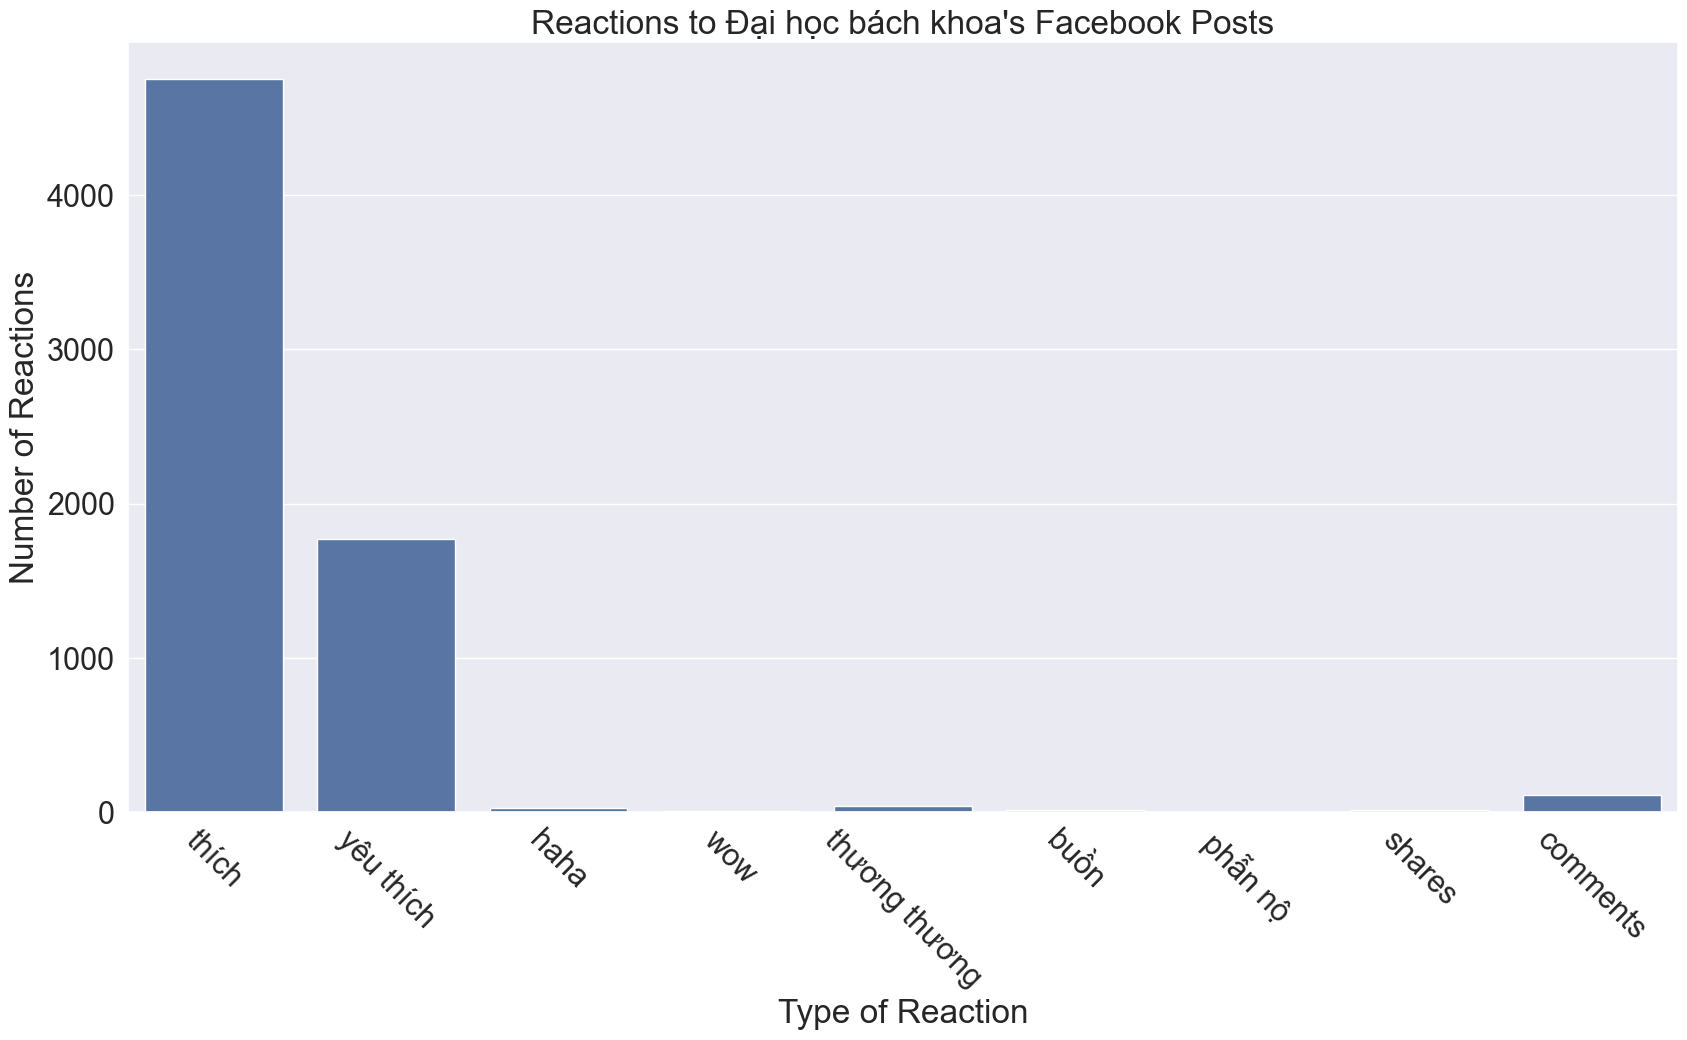

In [12]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(20,10)})
sns.set(font_scale=2)

# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
ax.set_title("Reactions to Đại học bách khoa's Facebook Posts")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

In [13]:
clean_data['reaction_count'].mean()

519.4

In [14]:
clean_data['comments'].mean()

36.47857142857143

In [15]:
clean_data['shares'].mean()

12.642857142857142

In [16]:
month = []
hour = []
days = []
for i in range(len(clean_data)):
    time = clean_data['time'][i].split(" ")[1].split(":")
    date = clean_data['time'][i].split(" ")[0].split("-")
    month.append(int(date[1]))
    hour.append(int(time[0]))
    days.append(date[2])

Text(0, 0.5, 'Số lượng bài viết')

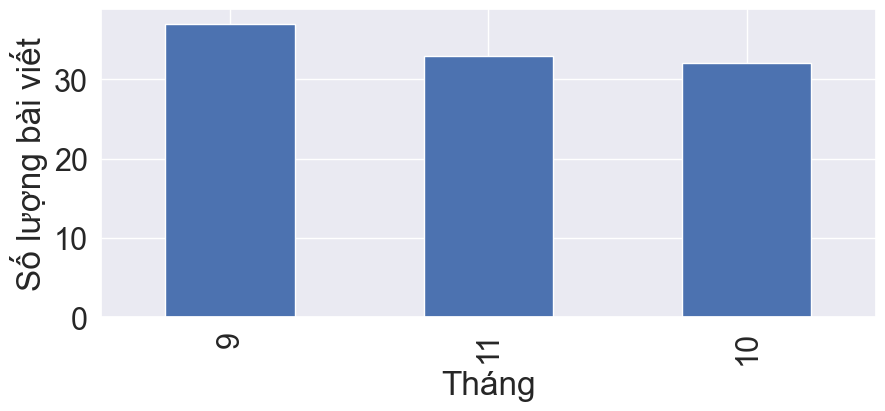

In [17]:
clean_data['day'] = days
clean_data['month'] = month
f = clean_data.loc[clean_data['month'] > 8]
s = f['month'].value_counts()
bp = s.plot(kind='bar', figsize=(10,4))
bp.set_xlabel("Tháng")
bp.set_ylabel("Số lượng bài viết")

Text(0, 0.5, 'Số bài đăng')

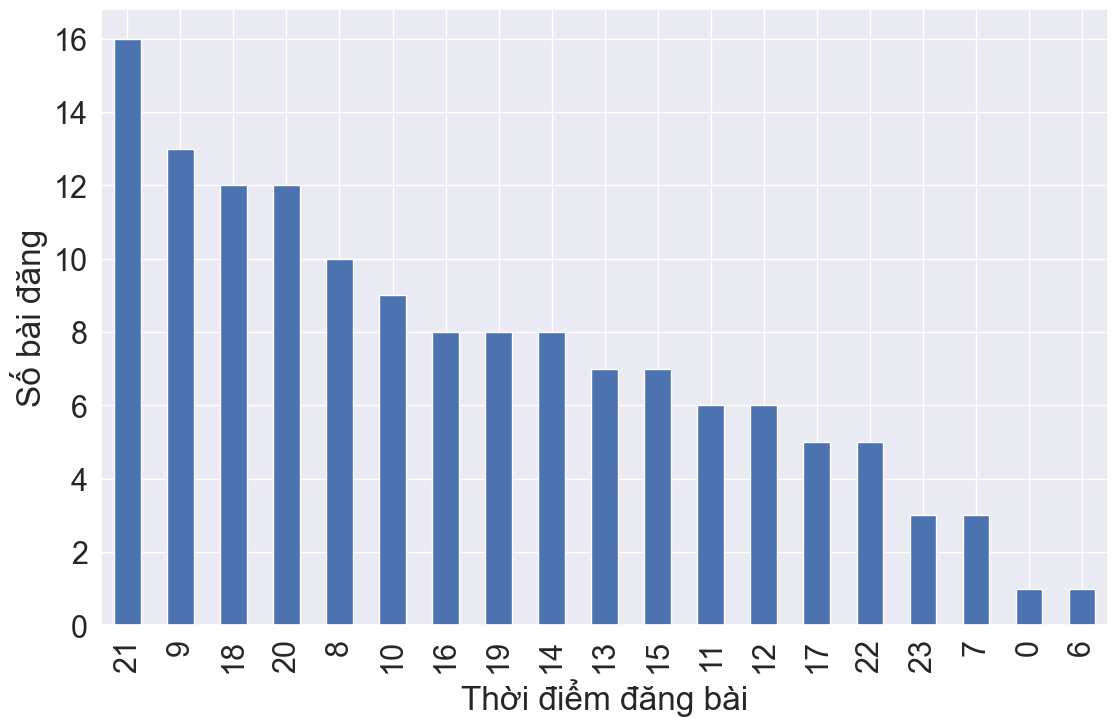

In [18]:
clean_data['hour'] = hour
h = clean_data['hour'].value_counts()
t = h.plot(kind = 'bar', figsize=(13,8))
t.set_xlabel('Thời điểm đăng bài')
t.set_ylabel('Số bài đăng')

In [19]:
import ast
thich = []
yeu_thich = []
haha = []
wow = []
thuong_thuong = []
buon = []
phan_no = []
for i in range(len(clean_data)):
     if ((clean_data['reaction_count'][i] != 0)):
            dictionary_result = ast.literal_eval(clean_data['reactions'][i])
            so_luot_thich = dictionary_result.get('thích', 0) + dictionary_result.get('like',0)
            so_yeu_thich = dictionary_result.get('yêu thích', 0) + dictionary_result.get('love', 0)
            so_haha = dictionary_result.get('haha', 0)
            so_wow = dictionary_result.get('wow',0)
            so_thuong_thuong = dictionary_result.get('thương thương',0) +dictionary_result.get('care', 0)
            so_buon = dictionary_result.get('buồn', 0) + dictionary_result.get('sad', 0)
            so_phan_no = dictionary_result.get('phẫn nộ',0) + dictionary_result.get('angry', 0)
            thich.append(so_luot_thich)
            yeu_thich.append(so_yeu_thich)
            haha.append(so_haha)
            wow.append(so_wow)
            thuong_thuong.append(so_thuong_thuong)
            buon.append(so_buon)
            phan_no.append(so_phan_no)
     else:
            thich.append(0)
            yeu_thich.append(0)
            haha.append(0)
            wow.append(0)
            thuong_thuong.append(0)
            buon.append(0)
            phan_no.append(0)


In [20]:
s = pd.DataFrame({'Số lượng': [sum(thich),sum(yeu_thich),sum(haha),sum(wow),sum(thuong_thuong),sum(buon),sum(phan_no)],
                  'Phần trăm (%)': [(sum(thich)/sum(raw_df['reaction_count']))*100,
                                   (sum(yeu_thich)/sum(raw_df['reaction_count']))*100,
                                   (sum(haha)/sum(raw_df['reaction_count']))*100,
                                   (sum(wow)/sum(raw_df['reaction_count']))*100,
                                   (sum(thuong_thuong)/sum(raw_df['reaction_count']))*100,
                                   (sum(buon)/sum(raw_df['reaction_count']))*100,
                                   (sum(phan_no)/sum(raw_df['reaction_count']))*100]})
s.index = ['Thích','Yêu thích','Haha','Wow','Thương thương','Buồn','Phẫn nộ']
s

,Số lượng,Phần trăm (%)
Thích,52056,71.588096
Yêu thích,17795,24.471918
Haha,1394,1.917047
Wow,192,0.264041
Thương thương,639,0.878761
Buồn,635,0.873260
Phẫn nộ,5,0.006876


<Axes: >

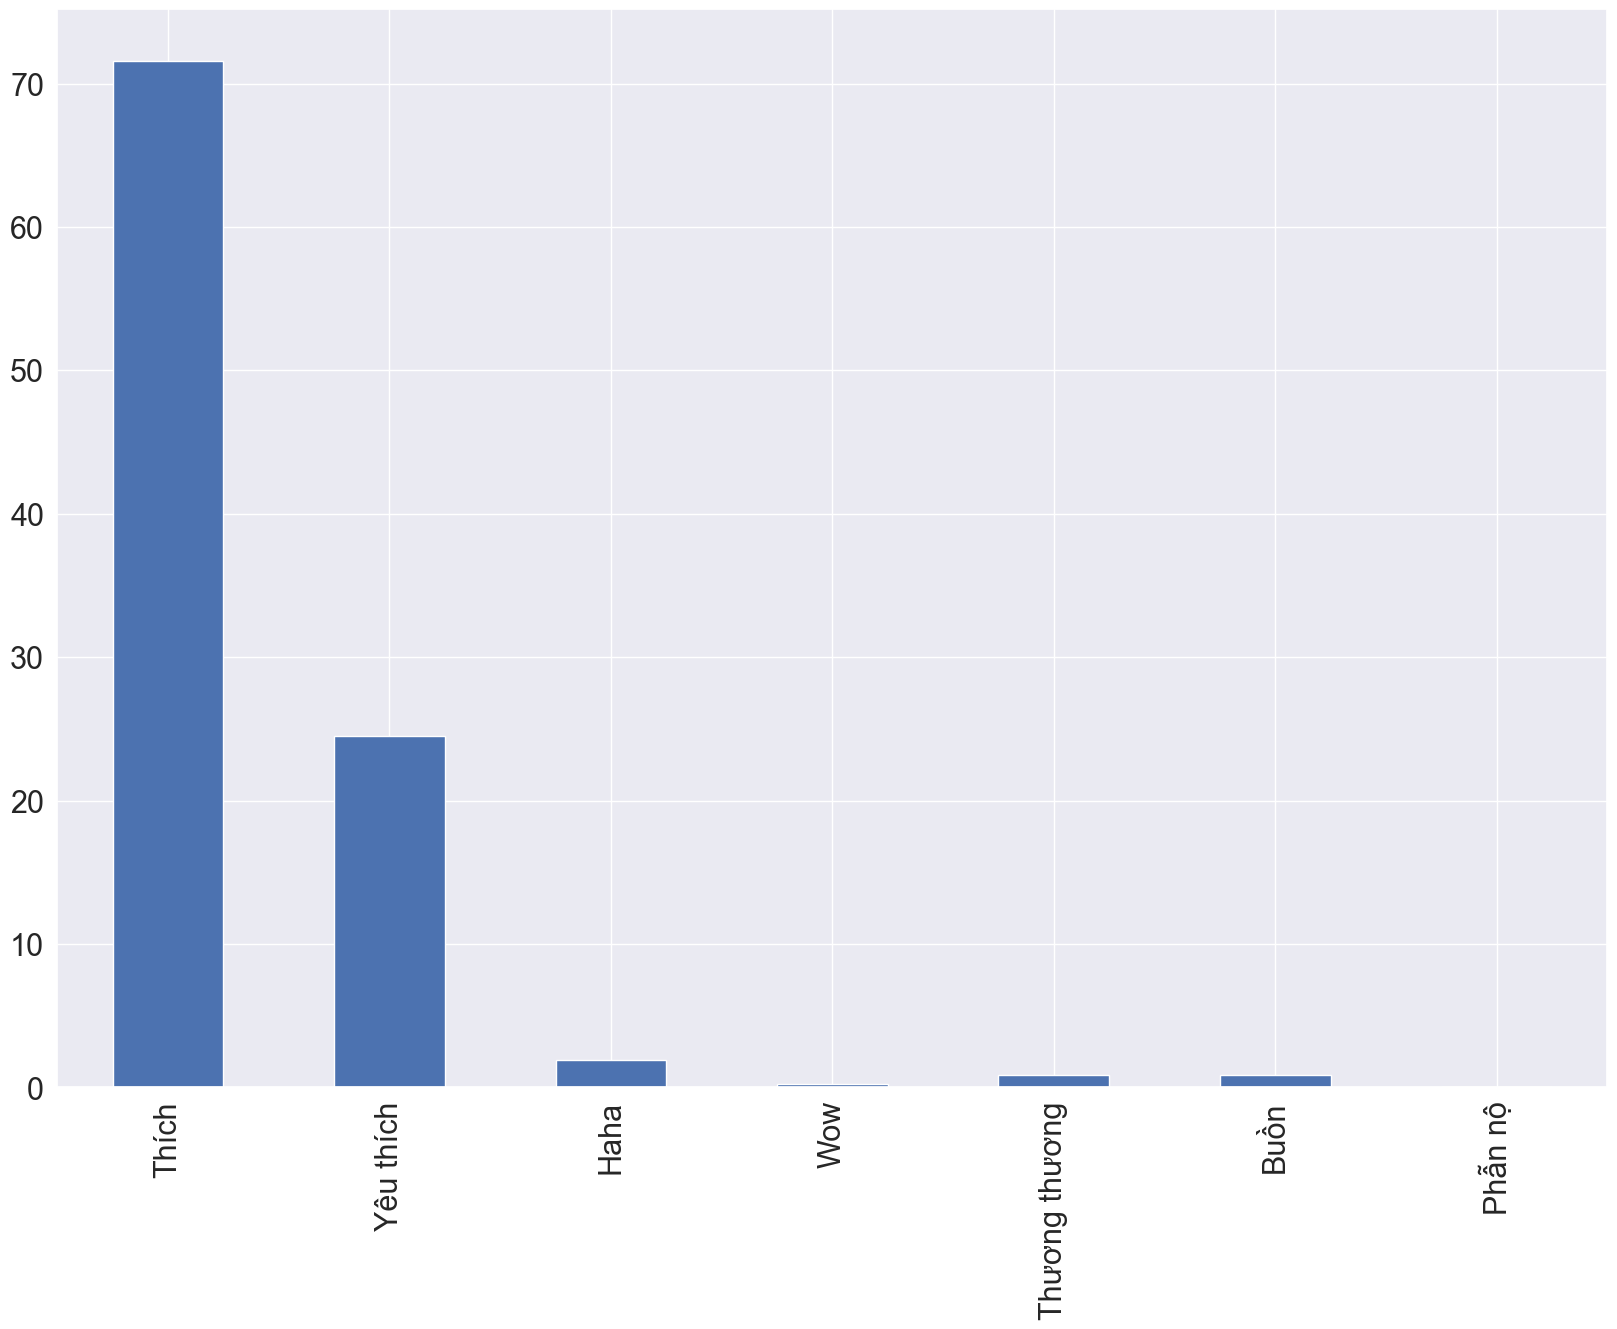

In [21]:
s['Phần trăm (%)'].plot(kind='bar', figsize=(20,14))

In [22]:
clean_data['thích'] = thich
clean_data['yêu_thích'] = yeu_thich
clean_data['haha'] = haha
clean_data['wow'] = wow
clean_data['thương_thương'] = thuong_thuong
clean_data['buồn'] = buon
clean_data['phẫn_nộ'] = phan_no
clean_data['day'] = days

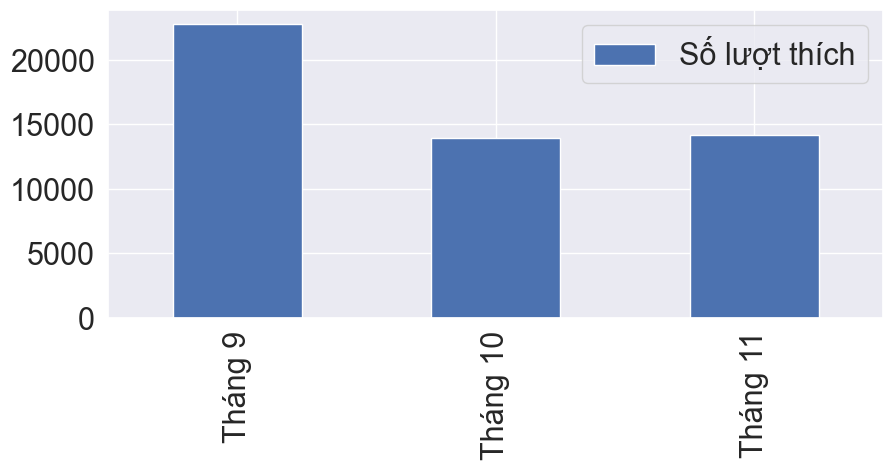

In [23]:
likes_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].thích)
likes_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].thích)
likes_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].thích)
l = pd.DataFrame({'Số lượt thích': [likes_of_month_9,likes_of_month_10,likes_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

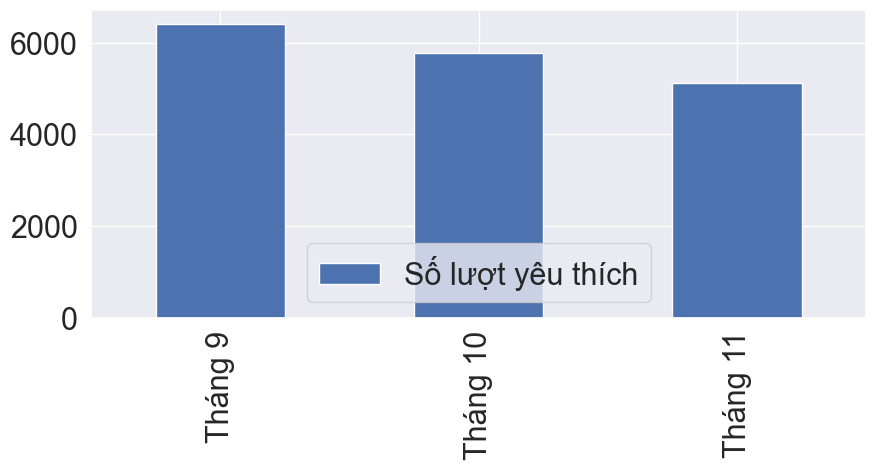

In [24]:
loves_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].yêu_thích)
loves_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].yêu_thích)
loves_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].yêu_thích)
l = pd.DataFrame({'Số lượt yêu thích': [loves_of_month_9,loves_of_month_10,loves_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

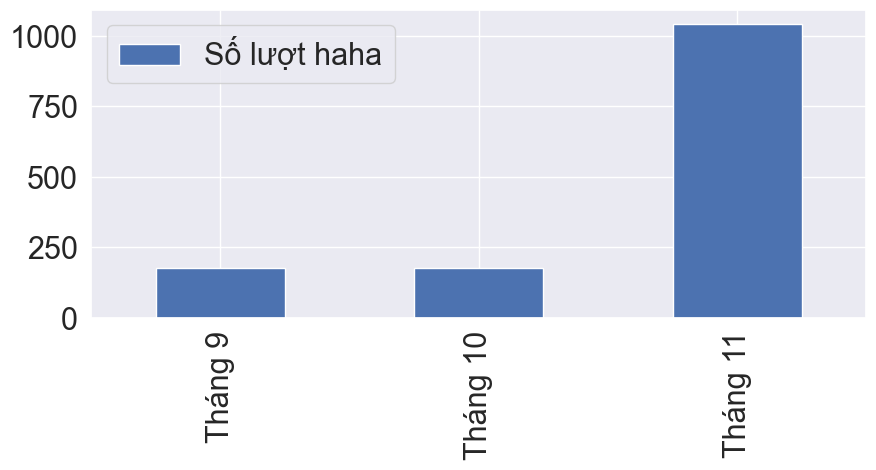

In [25]:
haha_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].haha)
haha_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].haha)
haha_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].haha)
l = pd.DataFrame({'Số lượt haha': [haha_of_month_9,haha_of_month_10,haha_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

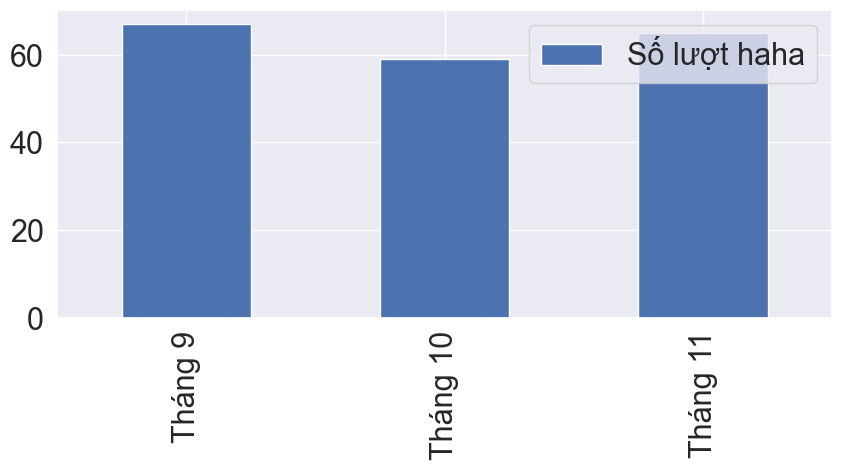

In [26]:
wow_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].wow)
wow_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].wow)
wow_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].wow)
l = pd.DataFrame({'Số lượt haha': [wow_of_month_9,wow_of_month_10,wow_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

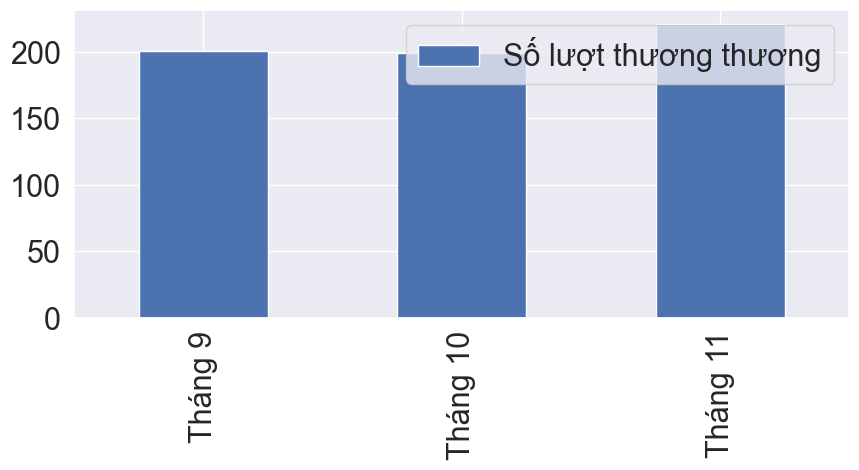

In [27]:
tt_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].thương_thương)
tt_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].thương_thương)
tt_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].thương_thương)
l = pd.DataFrame({'Số lượt thương thương': [tt_of_month_9,tt_of_month_10,tt_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

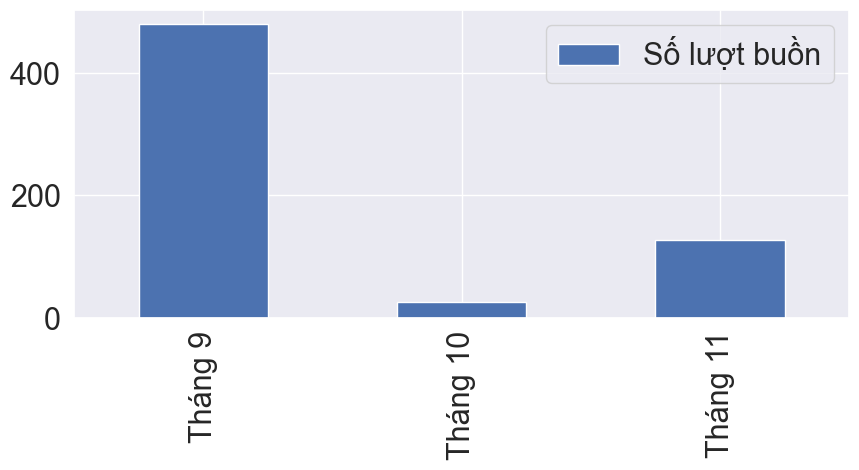

In [28]:
buon_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].buồn)
buon_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].buồn)
buon_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].buồn)
l = pd.DataFrame({'Số lượt buồn': [buon_of_month_9,buon_of_month_10,buon_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

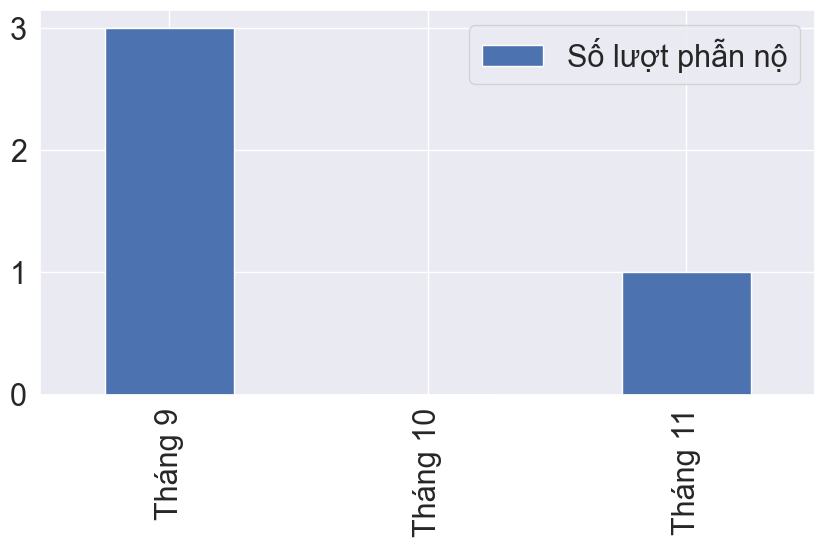

In [29]:
phan_no_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].phẫn_nộ)
phan_no_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].phẫn_nộ)
phan_no_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].phẫn_nộ)
l = pd.DataFrame({'Số lượt phẫn nộ': [phan_no_of_month_9,phan_no_of_month_10,phan_no_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,5))

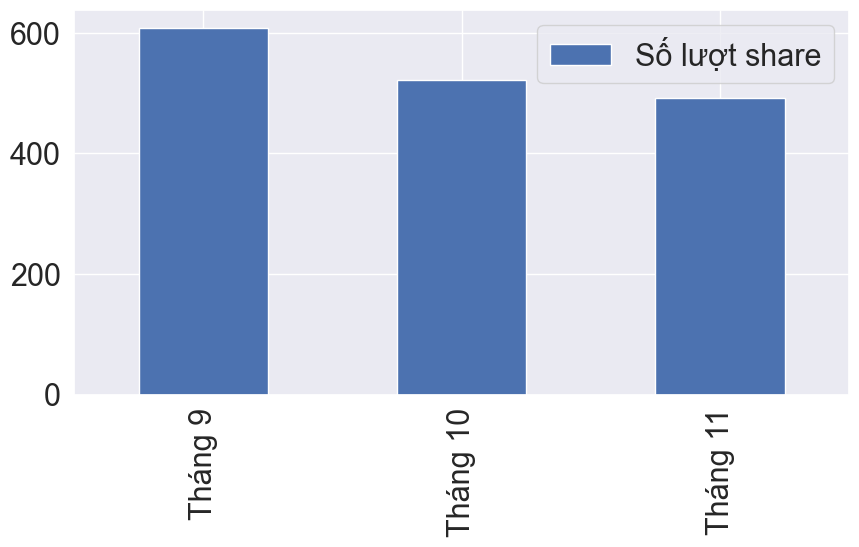

In [30]:
shares_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].shares)
shares_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].shares)
shares_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].shares)
l = pd.DataFrame({'Số lượt share': [shares_of_month_9,shares_of_month_10,shares_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,5))

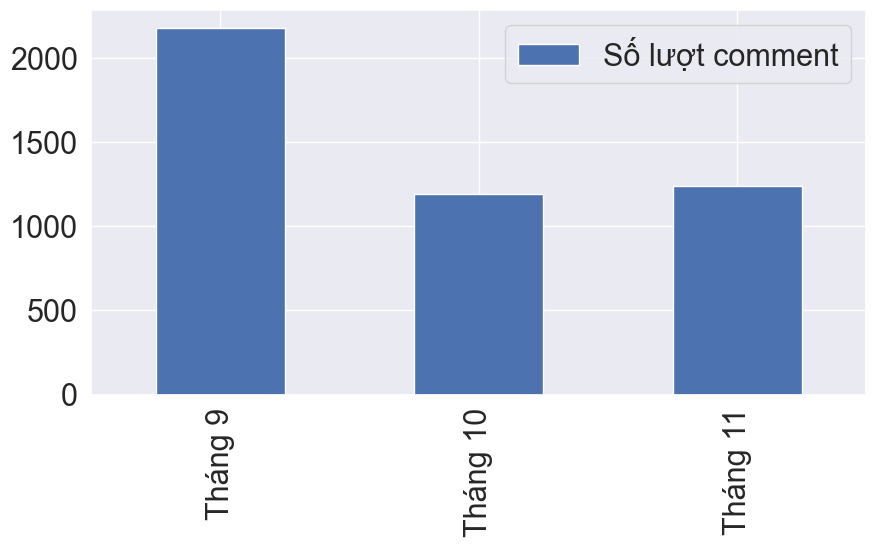

In [31]:
cm_of_month_9 = sum(clean_data.loc[clean_data['month'] == 9].comments)
cm_of_month_10 = sum(clean_data.loc[clean_data['month'] == 10].comments)
cm_of_month_11 = sum(clean_data.loc[clean_data['month'] == 11].comments)
l = pd.DataFrame({'Số lượt comment': [cm_of_month_9,cm_of_month_10,cm_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,5))

In [32]:
month_data = pd.DataFrame({"Thích" : [likes_of_month_9, likes_of_month_10, likes_of_month_11],
                           "Yêu_thích" : [loves_of_month_9, loves_of_month_10, loves_of_month_11],
                           "Wow" : [wow_of_month_9, wow_of_month_10, wow_of_month_11],
                           "Haha" : [haha_of_month_9, haha_of_month_10, haha_of_month_11],
                           "Thương_thương" : [tt_of_month_9, tt_of_month_10, tt_of_month_11],
                           "Buồn" : [buon_of_month_9, buon_of_month_10, buon_of_month_11],
                           "Phẫn_nộ" : [phan_no_of_month_9, phan_no_of_month_10, phan_no_of_month_11],
                           "Shares" : [shares_of_month_9, shares_of_month_10, shares_of_month_11],
                           "Comment" : [cm_of_month_9, cm_of_month_10, cm_of_month_11]})
month_data.index = ['Tháng_9', 'Tháng_10', 'Tháng_11']
month_data

,Thích,Yêu_thích,Wow,Haha,Thương_thương,Buồn,Phẫn_nộ,Shares,Comment
Tháng_9,22788,6407,67,175,201,480,3,608,2177
Tháng_10,13942,5788,59,175,199,26,0,521,1193
Tháng_11,14153,5131,65,1042,221,127,1,491,1238


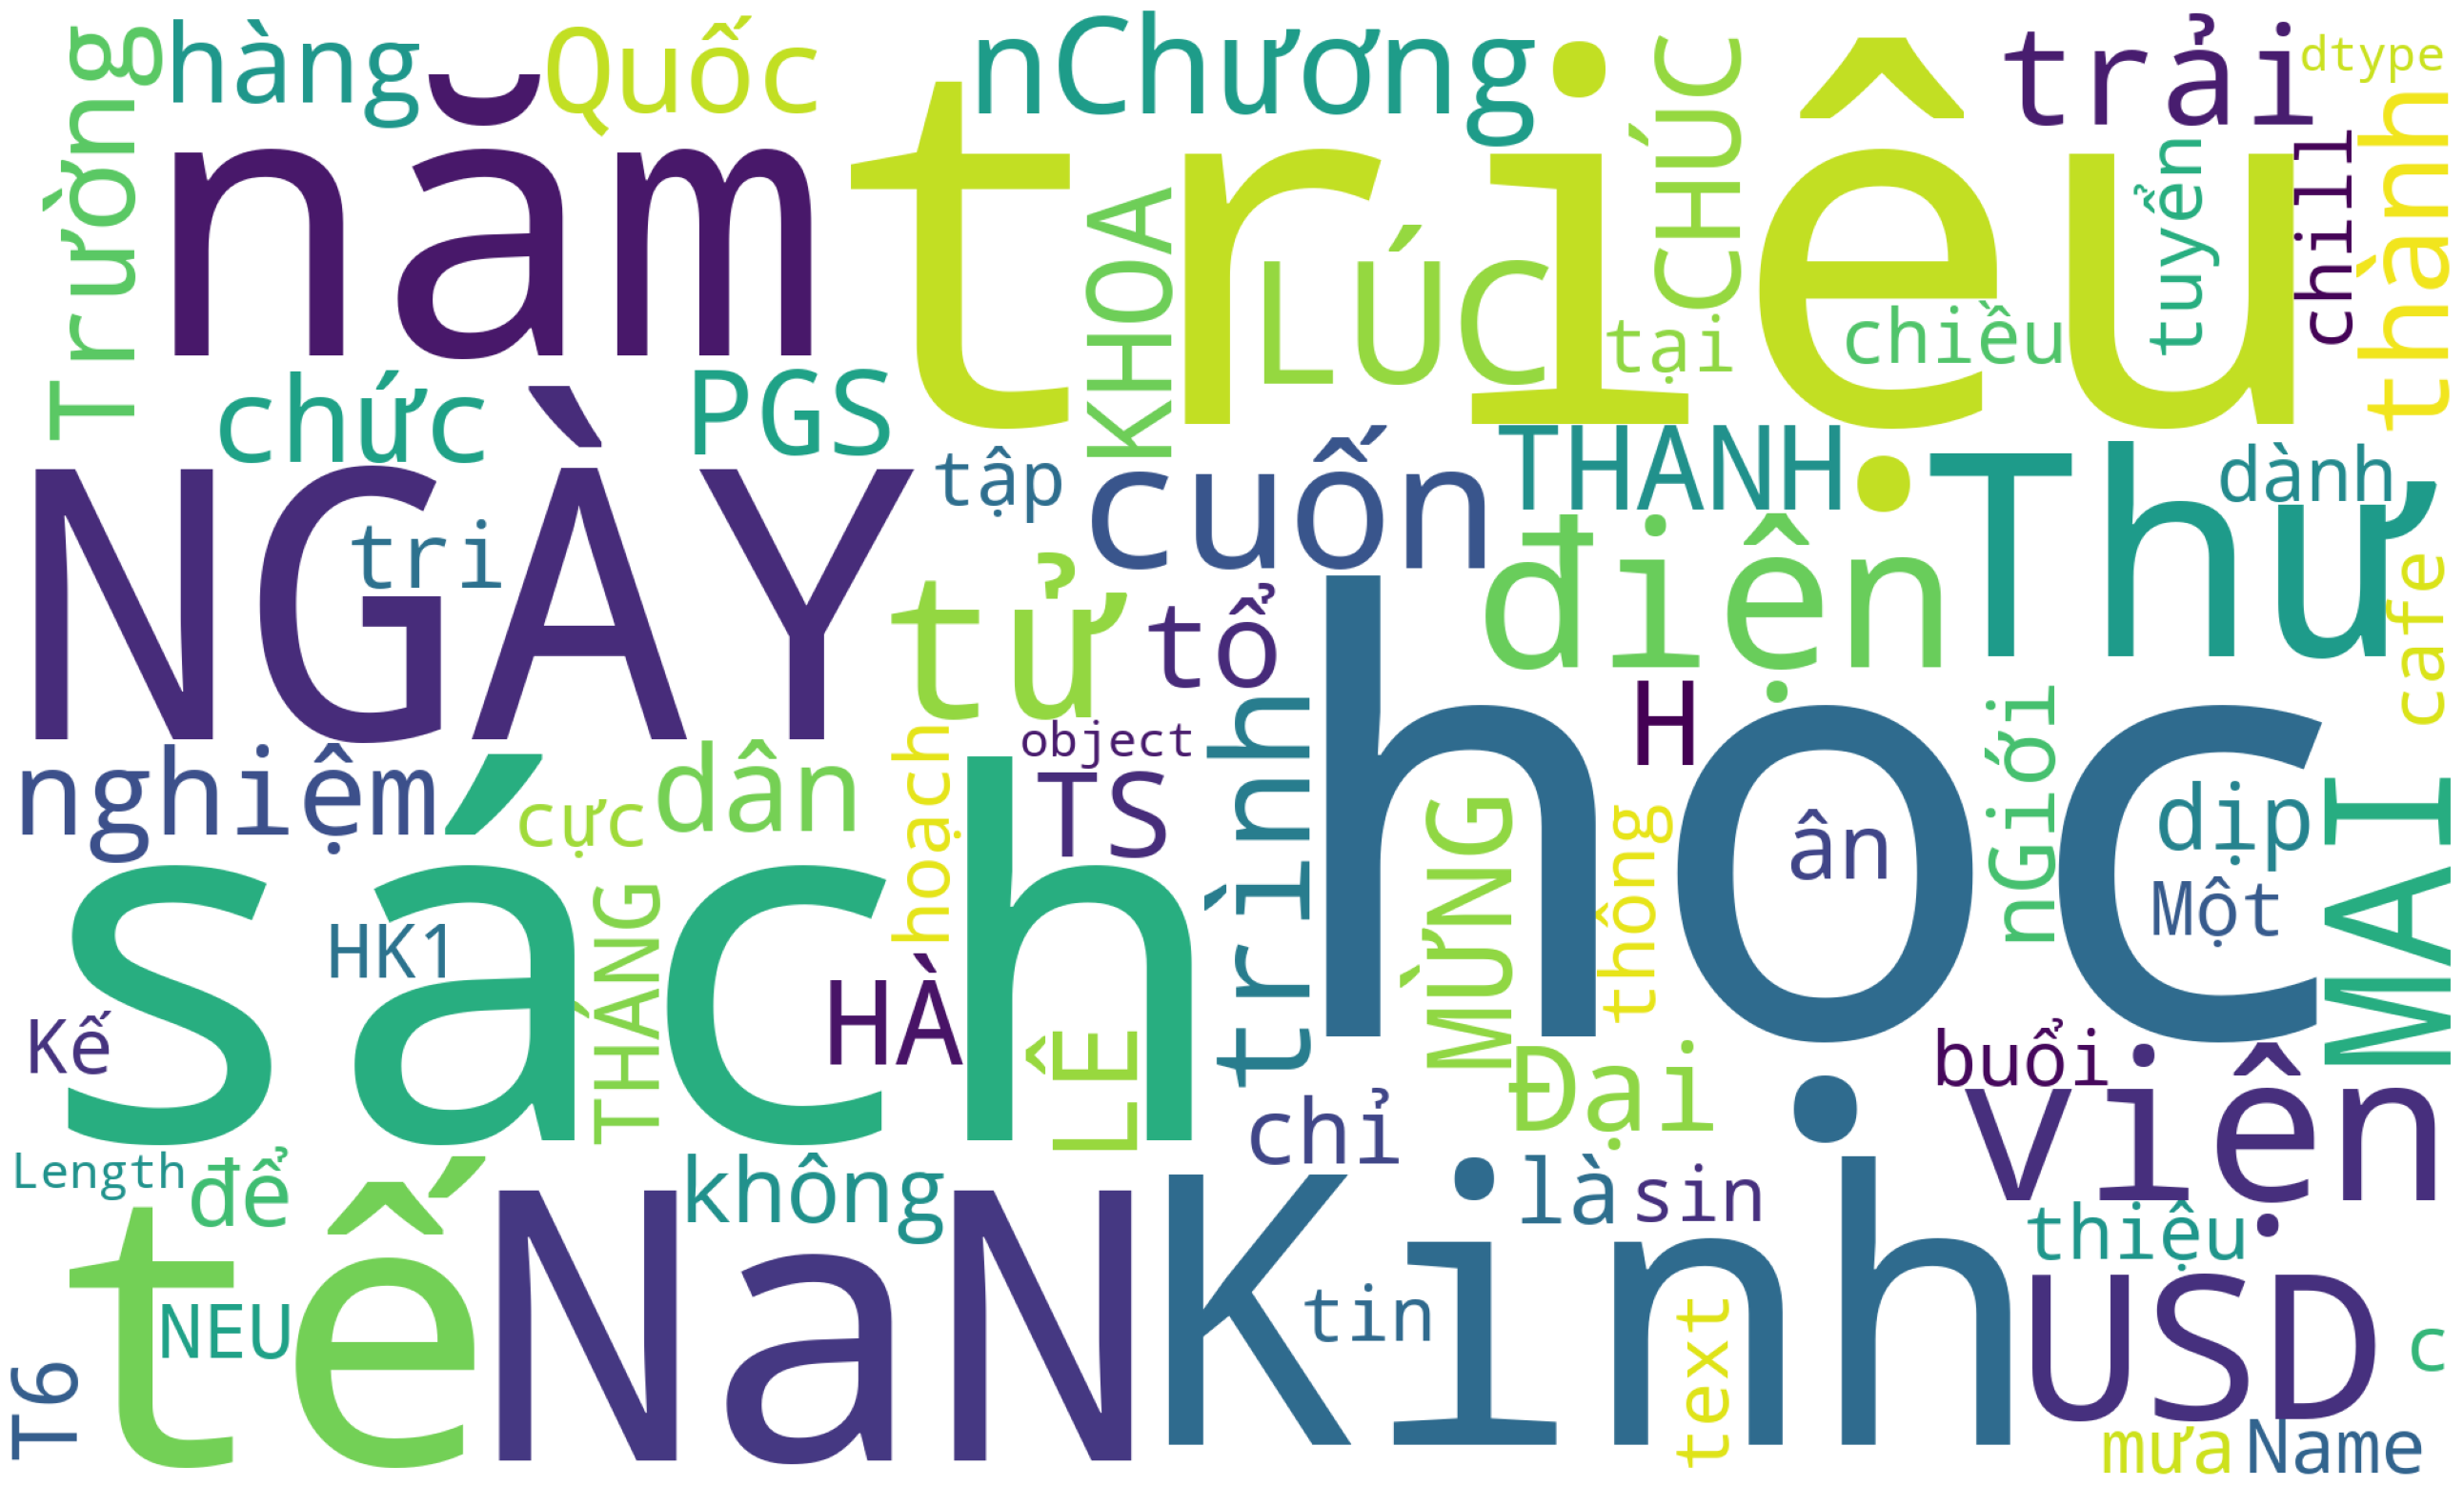

In [33]:
from wordcloud import WordCloud, STOPWORDS

text = str(clean_data['text'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()